In [90]:
import pandas as pd
train_df = pd.read_csv('loan-train.csv', sep=',')
train = train_df.copy()
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
test_df = pd.read_csv('loan-test.csv',sep=',')
test = test_df.copy()
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [92]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [93]:
for i in ('Gender', 'Married', 'Dependents', 'Education'):
    print(train[i].value_counts(),"\n")

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 



<AxesSubplot:xlabel='Gender', ylabel='count'>

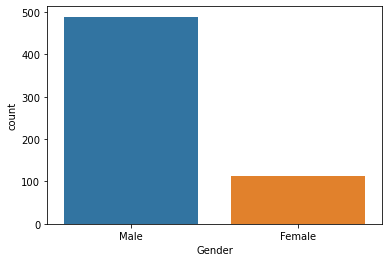

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender', data=train)

C:\Users\abiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

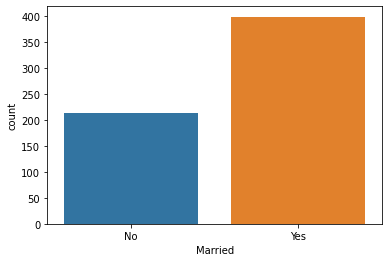

In [95]:
sns.countplot(train.Married)

C:\Users\abiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

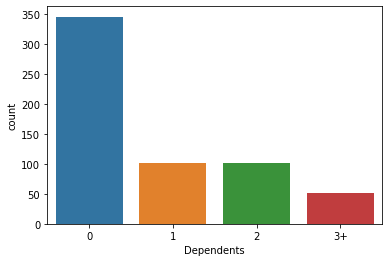

In [96]:
sns.countplot(train.Dependents)

C:\Users\abiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

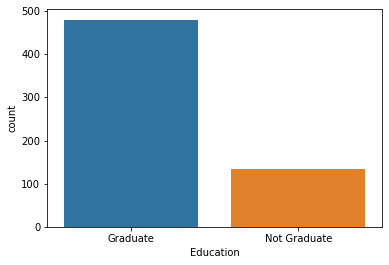

In [97]:
sns.countplot(train.Education)

<AxesSubplot:>

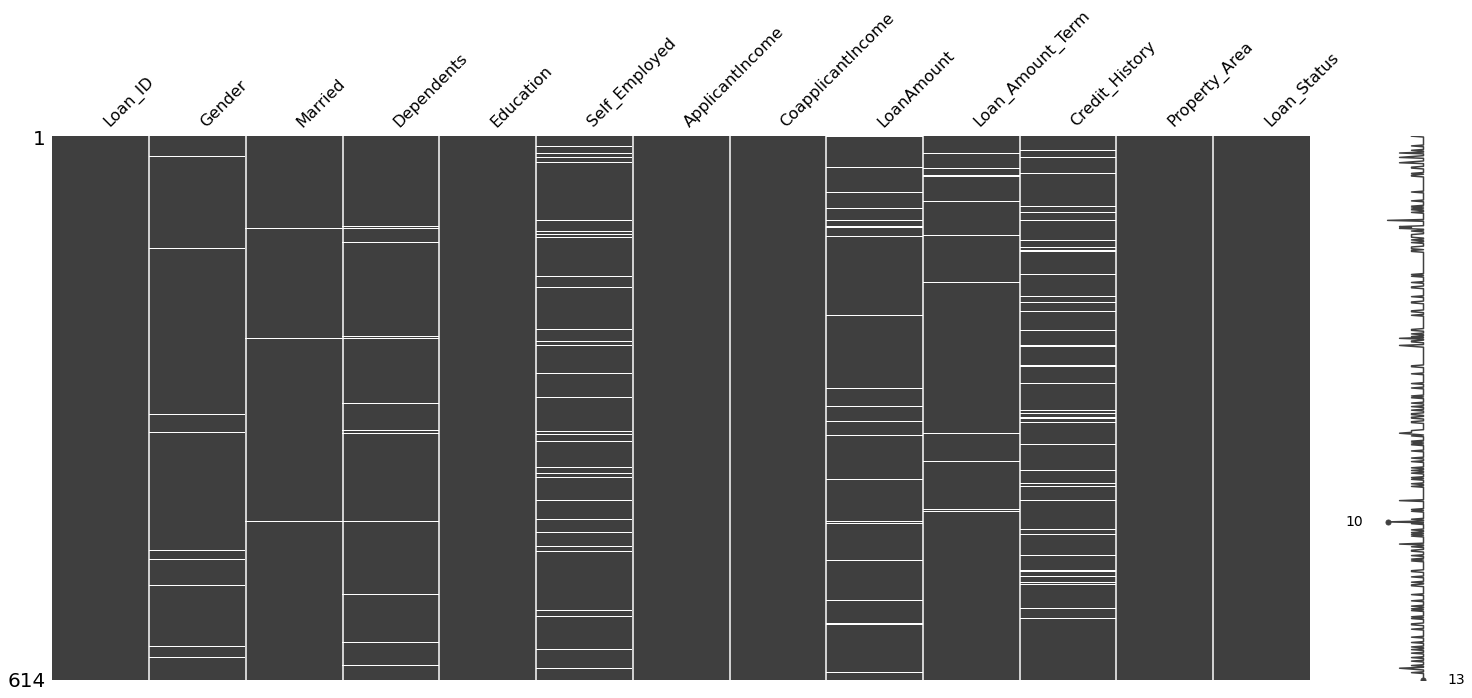

In [123]:
import missingno as msno
msno.matrix(train)

In [98]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [99]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

cleaned_data_train = train.drop(columns=['Loan_ID'], axis=1)
cleaned_data_train = cleaned_data_train.dropna()
cleaned_data_train.reset_index(drop=True, inplace=True)
cleaned_data_encode = cleaned_data_train.copy()
for i in cleaned_data_encode.columns:
    if cleaned_data_encode[i].dtype == np.int64:
        continue
    cleaned_data_encode[i] = LabelEncoder().fit_transform(cleaned_data_encode[i])

cleaned_data_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             480 non-null    int32
 1   Married            480 non-null    int32
 2   Dependents         480 non-null    int32
 3   Education          480 non-null    int32
 4   Self_Employed      480 non-null    int32
 5   ApplicantIncome    480 non-null    int64
 6   CoapplicantIncome  480 non-null    int64
 7   LoanAmount         480 non-null    int64
 8   Loan_Amount_Term   480 non-null    int64
 9   Credit_History     480 non-null    int64
 10  Property_Area      480 non-null    int32
 11  Loan_Status        480 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 32.0 KB


In [100]:
from sklearn.model_selection import train_test_split
x = cleaned_data_encode.drop(columns=['Loan_Status'], axis=1)
y = cleaned_data_encode['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print('data train:\n', x_train.shape)
print(y_train.value_counts(normalize=True))
print('\ndata test:\n', x_test.shape)
print(y_test.value_counts(normalize=True))

data train:
 (336, 11)
1    0.690476
0    0.309524
Name: Loan_Status, dtype: float64

data test:
 (144, 11)
1    0.694444
0    0.305556
Name: Loan_Status, dtype: float64


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression().fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.46      0.60       104
           1       0.80      0.97      0.88       232

    accuracy                           0.81       336
   macro avg       0.84      0.72      0.74       336
weighted avg       0.82      0.81      0.79       336



C:\Users\abiza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
lr = LogisticRegression().fit(x_test, y_test)
y_test_pred = lr.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.34      0.48        44
           1       0.77      0.97      0.86       100

    accuracy                           0.78       144
   macro avg       0.80      0.66      0.67       144
weighted avg       0.79      0.78      0.74       144



C:\Users\abiza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     No  Yes
No   48   56
Yes   7  225


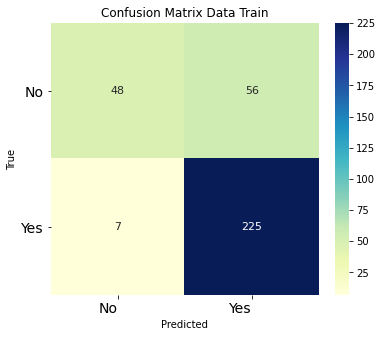

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_train = pd.DataFrame((confusion_matrix(y_train,y_train_pred)),('No','Yes'),('No','Yes'))
print(conf_train)

plt.figure(figsize=(6,5))
hmp = sns.heatmap(conf_train, annot=True, annot_kws={'size':11}, fmt='d', cmap='YlGnBu')
hmp.yaxis.set_ticklabels(hmp.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
hmp.xaxis.set_ticklabels(hmp.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix Data Train')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

     No  Yes
No   15   29
Yes   3   97


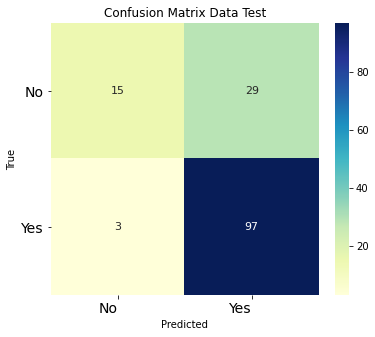

In [104]:

conf_test = pd.DataFrame((confusion_matrix(y_test,y_test_pred)),('No','Yes'),('No','Yes'))
print(conf_test)

plt.figure(figsize=(6,5))
hmp = sns.heatmap(conf_test, annot=True, annot_kws={'size':11}, fmt='d', cmap='YlGnBu')
hmp.yaxis.set_ticklabels(hmp.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
hmp.xaxis.set_ticklabels(hmp.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix Data Test')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [105]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [106]:
y_train_pred_svm = classifier.predict(x_train)
print(classification_report(y_train, y_train_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.45      0.60       104
           1       0.80      0.97      0.88       232

    accuracy                           0.81       336
   macro avg       0.84      0.71      0.74       336
weighted avg       0.83      0.81      0.79       336



In [107]:

training_data_accuray = accuracy_score(y_train, y_train_pred_svm)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8125


In [108]:
y_test_pred_svm = classifier.predict(x_test)
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51        44
           1       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144



In [109]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [110]:
for col in cleaned_data_train.columns:
    if cleaned_data_train[col].dtype == np.object:
        print(col, ':', cleaned_data_train[col].unique(), ">>>", cleaned_data_encode[col].unique())

Gender : ['Male' 'Female'] >>> [1 0]
Married : ['Yes' 'No'] >>> [1 0]
Dependents : ['1' '0' '2' '3+'] >>> [1 0 2 3]
Education : ['Graduate' 'Not Graduate'] >>> [0 1]
Self_Employed : ['No' 'Yes'] >>> [0 1]
Property_Area : ['Rural' 'Urban' 'Semiurban'] >>> [0 2 1]
Loan_Status : ['N' 'Y'] >>> [0 1]


In [112]:
Gender = input('Gender: Male (1) Female (0)')
Married = input('Married: Yes (1) No (0)')
Dependents = input('Dependents: 1/0/2/3')
Education = input('Education: Graduate (0) Not Graduate (1)')
Self_Employed = input('Self_Employed: No (0) Yes (1)')
ApplicantIncome = input('ApplicantIncome: ')
CoapplicantIncome = input('CoapplicantIncome: ')
LoanAmount = input('LoanAmount: ')
Loan_Amount_Term = input('Loan_Amount_Term: ')
Credit_History = input('Credit_History: ')
Property_Area = input('Property_Area: Rural (0) Urban (2) Semiurban (1)')

input_data = (Gender, Married, Dependents, Education, Self_Employed,
ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term, Credit_History, Property_Area)
input_data_as_numpy_array = np.asarray(input_data) 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
prediction = classifier.predict(input_data_reshaped)
print('Data Masukan Anda:\n', input_data)
print(prediction)

if (prediction[0] == 0):
  print('Maaf, anda tidak memenuhi syarat untuk pengajuan hutang')
else:
  print('\nSelamat, anda memenuhi syarat untuk pengajuan hutang')

Data Masukan Anda:
 ('1', '1', '1', '0', '1', '10000', '200', '0', '0', '1', '2')
[1]

Selamat, anda memenuhi syarat untuk pengajuan hutang


In [125]:
import pickle as pkl
filename = 'loan_eligibility_svm.pkl'
pkl.dump(classifier, open(filename, 'wb'))